# ***Project Analisa Data: Brazilian E-Commerce Public Dataset***


### <font color='darkred'>A. Data Wrangling</font>

#### Library Used
1. Pandas
2. Matplotlib
3. Numpy
4. Seaborn
5. Datatime

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

#### Dataset num-1: customer

##### Gathering Data

In [ ]:
# Read and view customers data
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head(6)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC


##### Accessing Data

In [ ]:
# View dimensions of dataframe
customers_df.shape

(99441, 5)

In [ ]:
# View all information related to dataframe
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


##### Cleaning Data

###### I. Remove Irrelevant Values

In [ ]:
# Remove columns 1 and 2
customers_df_slice = customers_df.drop(columns=["customer_unique_id", "customer_zip_code_prefix"])
customers_df_slice.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


###### II. Handling Missing Values

In [ ]:
# Count the number of missing values in each column
customers_df_slice.isnull().sum()

customer_id       0
customer_city     0
customer_state    0
dtype: int64

###### III. Data Manipulation

In [ ]:
# Cast type from spesific column
customers_df_slice['customer_city'] = customers_df_slice['customer_city'].astype(str)
# Change the initial character in each word to Uppercase
customers_df_slice['customer_city'] = customers_df_slice['customer_city'].str.title()
# Rewrite previous value in spesific column
customers_df_slice['customer_city'] = customers_df_slice['customer_city'].str.replace("_", " ")
customers_df_slice.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,Campinas,SP


###### IV. Deduplication

In [ ]:
# Check if there any duplicate value
customers_df_slice.duplicated().sum()

0

#### Dataset num-2: order

##### Gathering Data

In [ ]:
# Read and view orders data
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head(6)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00


##### Accessing Data

In [ ]:
# View dimensions of dataframe
orders_df.shape

(41340, 8)

In [ ]:
# View all information related to dataframe
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41340 entries, 0 to 41339
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       41340 non-null  object
 1   customer_id                    41340 non-null  object
 2   order_status                   41340 non-null  object
 3   order_purchase_timestamp       41340 non-null  object
 4   order_approved_at              41264 non-null  object
 5   order_delivered_carrier_date   40611 non-null  object
 6   order_delivered_customer_date  40111 non-null  object
 7   order_estimated_delivery_date  41339 non-null  object
dtypes: object(8)
memory usage: 2.5+ MB


##### Cleaning Data

###### I. Handling Missing Values - 1

In [ ]:
# Count the number of missing values in each column
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  76
order_delivered_carrier_date      729
order_delivered_customer_date    1229
order_estimated_delivery_date       1
dtype: int64

In [ ]:
# Sort the index of orders_df
orders_df_sort = orders_df.sort_index()
# Subset rows from order_status with 'delivered' value
orders_df_sort_custom = orders_df_sort.loc[(orders_df_sort['order_status'] == 'delivered')]
orders_df_sort_custom.head(6)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00


In [ ]:
# Count the number of missing values in each column
orders_df_sort_custom.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                8
order_delivered_carrier_date     1
order_delivered_customer_date    3
order_estimated_delivery_date    1
dtype: int64

In [ ]:
# Show all spesific row that have missing values
orders_df_sort_custom[orders_df_sort_custom['order_delivered_customer_date'].isnull() == True]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
41339,fc6e4c97f5307e9c1bc0797a45e40cbf,b195b30a0c289a41ee810335d3c06364,delivered,2018-03-14 17:57:56,2018,NaN,NaN,NaN


###### II. Remove Irrelevant Values - 1

In [ ]:
# Remove columns 4 and 5
orders_df_sort_slice = orders_df_sort_custom.drop(columns=["order_approved_at", "order_delivered_carrier_date"])
orders_df_sort_slice.head(6)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-26 10:57:55,2017-08-01 00:00:00


###### III. Data Type Conversions - 1

In [ ]:
# Converting format datetime
orders_df_sort_slice['order_purchase_timestamp'] = pd.to_datetime(orders_df_sort_slice.order_purchase_timestamp)
orders_df_sort_slice['order_delivered_customer_date'] = pd.to_datetime(orders_df_sort_slice.order_delivered_customer_date)
orders_df_sort_slice['order_estimated_delivery_date'] = pd.to_datetime(orders_df_sort_slice.order_estimated_delivery_date)

# Create new column to insert date
orders_df_sort_slice['order_purchase_date'] = orders_df_sort_slice['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
orders_df_sort_slice['order_delivered_date'] = orders_df_sort_slice['order_delivered_customer_date'].dt.strftime('%Y-%m-%d')

# View all information related to dataframe
orders_df_sort_slice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40112 entries, 0 to 41339
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       40112 non-null  object        
 1   customer_id                    40112 non-null  object        
 2   order_status                   40112 non-null  object        
 3   order_purchase_timestamp       40112 non-null  datetime64[ns]
 4   order_delivered_customer_date  40109 non-null  datetime64[ns]
 5   order_estimated_delivery_date  40111 non-null  datetime64[ns]
 6   order_purchase_date            40112 non-null  object        
 7   order_delivered_date           40109 non-null  object        
dtypes: datetime64[ns](3), object(5)
memory usage: 2.8+ MB


###### IV. Remove Irrelevant Values - 2

In [ ]:
# Remove columns 6
orders_df_sort_slice_new = orders_df_sort_slice.drop(columns=["order_delivered_customer_date"])

###### V. Data Type Conversions - 2

In [ ]:
# Converting format datetime
orders_df_sort_slice_new['order_purchase_date'] = pd.to_datetime(orders_df_sort_slice.order_purchase_date)
orders_df_sort_slice_new['order_delivered_date'] = pd.to_datetime(orders_df_sort_slice.order_delivered_date)

###### VI. Handling Missing Values - 2

In [ ]:
# Count the number of missing values in each column
orders_df_sort_slice_new.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    1
order_purchase_date              0
order_delivered_date             3
dtype: int64

In [ ]:
# Replacing the missing date column with backfill method
orders_df_new_bfil = orders_df_sort_slice_new.copy()
orders_df_new_bfil['order_delivered_date'].fillna(method='bfill', inplace=True)
orders_df_new_bfil.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    1
order_purchase_date              0
order_delivered_date             1
dtype: int64

###### V. Deduplication

In [ ]:
# Check if there any duplicate value
orders_df_new_bfil.duplicated().sum()

0

#### Dataset num-3: order-payment

##### Gathering Data

In [ ]:
# Read and view order-payment data
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_payments_df.head(6)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12


##### Accessing Data

In [ ]:
# View dimensions of dataframe
order_payments_df.shape

(103886, 5)

In [ ]:
# View all information related to dataframe
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


##### Cleaning Data

###### I. Remove Irrelevant Values

In [ ]:
# Remove columns 4 and 5
order_payments_df_slice = order_payments_df.drop(columns=["payment_sequential", "payment_installments"])
order_payments_df_slice.head()

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45


###### II. Handling Missing Values

In [ ]:
# Count the number of missing values in each column
order_payments_df_slice.isnull().sum()

order_id         0
payment_type     0
payment_value    0
dtype: int64

###### III. Data Manipulation

In [ ]:
# Cast type from spesific column
order_payments_df_slice['payment_type'] = order_payments_df_slice['payment_type'].astype(str)
# Change the initial character in each word to Uppercase
order_payments_df_slice['payment_type'] = order_payments_df_slice['payment_type'].str.title()
# Rewrite previous value in spesific column
order_payments_df_slice['payment_type'] = order_payments_df_slice['payment_type'].str.replace("_", " ")
order_payments_df_slice

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,Credit Card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,Credit Card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,Credit Card,65.71
3,ba78997921bbcdc1373bb41e913ab953,Credit Card,107.78
4,42fdf880ba16b47b59251dd489d4441a,Credit Card,128.45
...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,Boleto,363.31
103882,7b905861d7c825891d6347454ea7863f,Credit Card,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,Credit Card,47.77
103884,b8b61059626efa996a60be9bb9320e10,Credit Card,369.54


###### IV. Deduplication

In [ ]:
# Check if there any duplicate value
order_payments_df_slice.duplicated().sum()

615

In [ ]:
# Remove duplicated value
order_payments_df_slice.drop_duplicates(inplace=True)

In [ ]:
# Check if there any duplicate value
order_payments_df_slice.duplicated().sum()

0

#### Dataset num-4: order-item

##### Gathering Data

In [ ]:
# Read and view order-item data
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head(6)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69


##### Accessing Data

In [ ]:
# View dimensions of dataframe
order_items_df.shape

(112650, 7)

In [ ]:
# View all information related to dataframe
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


##### Cleaning Data

###### I. Remove Irrelevant Values

In [ ]:
# Remove columns 1,4, 5 and 6
order_items_df_sort_slice = order_items_df.drop(columns=["order_item_id", "shipping_limit_date", "freight_value", 'price'])
order_items_df_sort_slice.head()

,order_id,product_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87


###### II. Handling Missing Values

In [ ]:
# Count the number of missing values in each column
order_items_df_sort_slice.isnull().sum()

order_id      0
product_id    0
seller_id     0
dtype: int64

###### III. Deduplication

In [ ]:
# Check if there any duplicate value
order_items_df_sort_slice.duplicated().sum()

10225

In [ ]:
# Remove duplicated value
order_items_df_sort_slice.drop_duplicates(inplace=True)

In [ ]:
# Check if there any duplicate value
order_items_df_sort_slice.duplicated().sum()

0

#### Dataset num-5: product

##### Gathering Data

In [ ]:
# Read and view product data
products_df = pd.read_csv("products_dataset.csv")
products_df.head(6)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0


##### Accessing Data

In [ ]:
# View dimensions of dataframe
products_df.shape

(32951, 9)

In [ ]:
# View all information related to dataframe
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


##### Cleaning Data

###### I. Remove Irrelevant Values

In [ ]:
# Use slicing to get columns 1 to 2
products_df_slice = products_df.iloc[:,:2]
products_df_slice.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


###### II. Data Manipulate

In [ ]:
# Customize product_category_name value
products_df_slice['product_category_name'] = products_df_slice['product_category_name'].astype(str)
products_df_slice['product_category_name'] = products_df_slice['product_category_name'].str.title()
products_df_slice['product_category_name'] = products_df_slice['product_category_name'].str.replace("_", " ")
products_df_slice.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,Artes
2,96bd76ec8810374ed1b65e291975717f,Esporte Lazer
3,cef67bcfe19066a932b7673e239eb23d,Bebes
4,9dc1a7de274444849c219cff195d0b71,Utilidades Domesticas


###### III. Handling Missing Values

In [ ]:
# Count the number of missing values in each column
products_df_slice.isnull().sum()

product_id               0
product_category_name    0
dtype: int64

###### IV. Deduplication

In [ ]:
# Check if there any duplicate value
products_df_slice.duplicated().sum()

0

#### Data Understanding

##### Data Manipulation

In [ ]:
orders_df_new_bfil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40112 entries, 0 to 41339
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       40112 non-null  object        
 1   customer_id                    40112 non-null  object        
 2   order_status                   40112 non-null  object        
 3   order_purchase_timestamp       40112 non-null  datetime64[ns]
 4   order_estimated_delivery_date  40111 non-null  datetime64[ns]
 5   order_purchase_date            40112 non-null  datetime64[ns]
 6   order_delivered_date           40111 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 2.4+ MB


In [ ]:
# Copy existing dataFrame into new dataFrame
order_df_new = orders_df_new_bfil.copy()
# Extracting attributes for Order date - Year and Month
order_df_new['order_date_year'] = order_df_new['order_purchase_date'].apply(lambda x: x.year)
order_df_new['order_date_month'] = order_df_new['order_purchase_date'].apply(lambda x: x.month)
order_df_new['month-year'] = order_df_new['order_purchase_date'].dt.strftime('%B') + '-' + order_df_new['order_purchase_date'].dt.strftime('%Y')
# Extracting attributes for Order date - day
order_df_new['order_date_day'] = order_df_new['order_purchase_date'].dt.day_name()
display(order_df_new.head(6))

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_purchase_date,order_delivered_date,order_date_year,order_date_month,month-year,order_date_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,2017-10-02,2017-10-10,2017,10,October-2017,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,2018-07-24,2018-08-07,2018,7,July-2018,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,2018-08-08,2018-08-17,2018,8,August-2018,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15,2017-11-18,2017-12-02,2017,11,November-2017,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26,2018-02-13,2018-02-16,2018,2,February-2018,Tuesday
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-08-01,2017-07-09,2017-07-26,2017,7,July-2017,Sunday


##### Join DataFrame

In [ ]:
# Combine all custom table into 1 dataFrame
order_cust_df = order_df_new.merge(customers_df_slice, on='customer_id')
order_cust_payment_df = order_cust_df.merge(order_payments_df_slice, on='order_id')
order_cust_payment_item_df = order_cust_payment_df.merge(order_items_df_sort_slice, on='order_id')
order_cust_payment_item_product_df = order_cust_payment_item_df.merge(products_df_slice, on='product_id')
ecommerce_df = order_cust_payment_item_product_df.copy()

In [ ]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43263 entries, 0 to 43262
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       43263 non-null  object        
 1   customer_id                    43263 non-null  object        
 2   order_status                   43263 non-null  object        
 3   order_purchase_timestamp       43263 non-null  datetime64[ns]
 4   order_estimated_delivery_date  43262 non-null  datetime64[ns]
 5   order_purchase_date            43263 non-null  datetime64[ns]
 6   order_delivered_date           43262 non-null  datetime64[ns]
 7   order_date_year                43263 non-null  int64         
 8   order_date_month               43263 non-null  int64         
 9   month-year                     43263 non-null  object        
 10  order_date_day                 43263 non-null  object        
 11  customer_city  

### <font color='darkred'>B. Explore Data Analytics(EDA)</font>

#### Exploratory Analysis

##### Descriptive Statistic

In [ ]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43263 entries, 0 to 43262
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       43263 non-null  object        
 1   customer_id                    43263 non-null  object        
 2   order_status                   43263 non-null  object        
 3   order_purchase_timestamp       43263 non-null  datetime64[ns]
 4   order_estimated_delivery_date  43262 non-null  datetime64[ns]
 5   order_purchase_date            43263 non-null  datetime64[ns]
 6   order_delivered_date           43262 non-null  datetime64[ns]
 7   order_date_year                43263 non-null  int64         
 8   order_date_month               43263 non-null  int64         
 9   month-year                     43263 non-null  object        
 10  order_date_day                 43263 non-null  object        
 11  customer_city  

In [ ]:
# View details of descriptive statistic
ecommerce_df[['payment_value']].describe()

,payment_value
count,43263.000000
mean,158.232882
std,230.056088
min,0.000000
25%,58.500000
50%,102.750000
75%,175.770000
max,13664.080000


##### Year and Income data

In [ ]:
# Check total income of the store per year
yearly_income_total = ecommerce_df.groupby(by='order_date_year').agg(grand_total = ('payment_value', pd.Series.sum))
yearly_income_total = yearly_income_total.sort_values(by = ['grand_total'], ascending=False)
yearly_income_total

,grand_total
order_date_year,
2018,3747608.40
2017,3077935.46
2016,20085.33


##### Month and Income data

In [ ]:
# Check total income of the store per year
monthly_income_total = ecommerce_df.groupby(by='order_date_month').agg(grand_total = ('payment_value', pd.Series.sum))
monthly_income_total = monthly_income_total.sort_values(by = ['order_date_month'], ascending=True)
monthly_income_total

,grand_total
order_date_month,
1,539061.95
2,542502.41
3,659254.28
4,663489.08
5,767236.60
6,660577.73
7,729258.20
8,723366.64
9,313753.21


##### Sales Growth per year & month

In [ ]:
# Calculate all the order_id per month & year
group_columns = ['order_date_year', 'order_date_month', 'month-year']
year_monthly_order = ecommerce_df.groupby(group_columns)['order_id'].nunique().reset_index()
year_monthly_order

,order_date_year,order_date_month,month-year,order_id
0,2016,10,October-2016,111
1,2016,12,December-2016,1
2,2017,1,January-2017,302
3,2017,2,February-2017,680
4,2017,3,March-2017,1038
5,2017,4,April-2017,956
6,2017,5,May-2017,1482
7,2017,6,June-2017,1291
8,2017,7,July-2017,1607
9,2017,8,August-2017,1741


##### Order total per year & month

In [ ]:
# Calculate all the order_id per month & year
group_columns = ['order_date_year', 'order_date_month', 'month-year']
year_monthly_order = ecommerce_df.groupby(group_columns)['order_id'].nunique().reset_index()
year_monthly_order

,order_date_year,order_date_month,month-year,order_id
0,2016,10,October-2016,111
1,2016,12,December-2016,1
2,2017,1,January-2017,302
3,2017,2,February-2017,680
4,2017,3,March-2017,1038
5,2017,4,April-2017,956
6,2017,5,May-2017,1482
7,2017,6,June-2017,1291
8,2017,7,July-2017,1607
9,2017,8,August-2017,1741


##### Product Category, Order, and Sales data

In [ ]:
# Product with top sales
grouped_data = ecommerce_df.groupby('product_category_name').agg(
    num_of_order=pd.NamedAgg(column='order_id', aggfunc='nunique'),
    sales=pd.NamedAgg(column='payment_value', aggfunc='sum')
).reset_index()

grouped_data = grouped_data.sort_values(by = ['num_of_order'], ignore_index = True, ascending=False)
grouped_data.head(5)

,product_category_name,num_of_order,sales
0,Cama Mesa Banho,3858,601890.71
1,Beleza Saude,3567,617011.24
2,Esporte Lazer,3168,474377.79
3,Informatica Acessorios,2713,465225.36
4,Moveis Decoracao,2615,403619.53


##### Payment type and order data

In [ ]:
# Check variety of payment type from customer transaction by order id
payment_order = ecommerce_df.groupby(by='payment_type')['order_id'].count().reset_index()
payment_order = payment_order.sort_values(by = ['order_id'],ascending=False)
payment_order

,payment_type,order_id
1,Credit Card,32249
0,Boleto,8231
3,Voucher,2128
2,Debit Card,655


#### Business Questions
1. Bagaimana trend penjualan per bulan selama beberapa tahun? <br>
2. Kategori produk dan lokasi negara bagian apa yang memiliki pemesanan tertinggi? <br>
3. Bagaimana persebaran metode pembayaran dari transaksi pelanggan?

#### Explanatory Analysis

##### Question num-1

###### Insert group data by year into new dataFrame

In [ ]:
year_monthly_order_2017 = year_monthly_order[year_monthly_order['order_date_year'] == 2017]
year_monthly_order_2018 = year_monthly_order[year_monthly_order['order_date_year'] == 2018]

###### Line Chart - Display Total Order Monthly on 2017

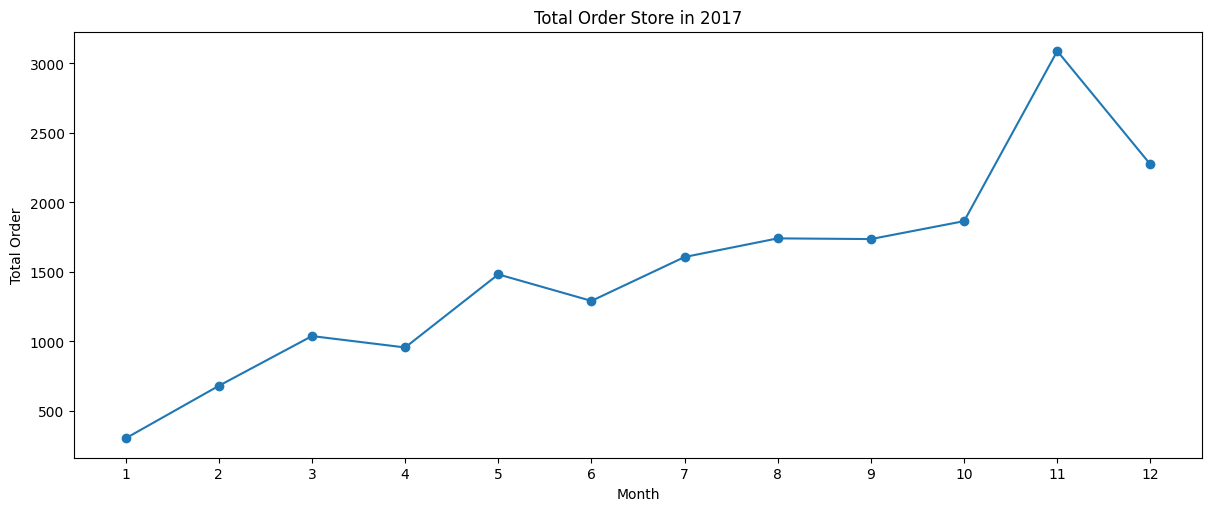

In [ ]:
# Adjust the figure size
plt.figure(constrained_layout=True, figsize=(12, 5))

# Create a line chart
plt.plot(year_monthly_order_2017['order_date_month'], year_monthly_order_2017['order_id'], marker='o')
plt.xticks(year_monthly_order_2017['order_date_month'])

# Set subplot properties
plt.title('Total Order Store in 2017')
plt.ylabel('Total Order');
plt.xlabel('Month')

plt.show()

We can see interseting information:
- From Jan to Desc, the lowest total sales in January with 750 total order
- While the highest peak sales was in November with 7289 total order

###### Line Chart - Display Total Order Monthly on 2018

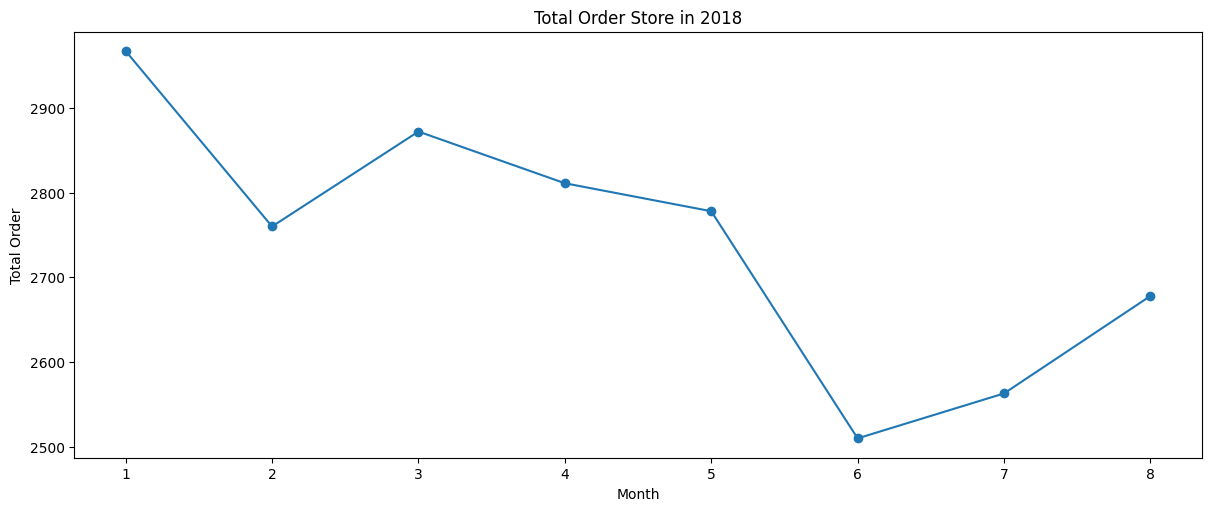

In [ ]:
# Adjust the figure size
plt.figure(constrained_layout=True, figsize=(12, 5))

# Create a line chart
plt.plot(year_monthly_order_2018['order_date_month'], year_monthly_order_2018['order_id'], marker='o')
plt.xticks(year_monthly_order_2018['order_date_month'])

# Set subplot properties
plt.title('Total Order Store in 2018')
plt.ylabel('Total Order');
plt.xlabel('Month')

plt.show()

We can see interseting information:
- As we can see, the number of total orders in 2018 has been drop many times
- The lowest total order was in June with 6099 total order

##### Question num-2

###### Insert group data by state into new dataFrame

In [ ]:
southeast_area = ['SP', 'RJ', 'ES','MG']
northeast_area = ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
north_area =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
cent_west_area = ['MT', 'GO', 'MS' ,'DF' ]
south_area = ['SC', 'RS', 'PR']

ecommerce_df.loc[ecommerce_df['customer_state'].isin(southeast_area), 'customer_Region'] = 'Southeast'
ecommerce_df.loc[ecommerce_df['customer_state'].isin(northeast_area), 'customer_Region'] = 'Northeast'
ecommerce_df.loc[ecommerce_df['customer_state'].isin(north_area), 'customer_Region'] = 'North'
ecommerce_df.loc[ecommerce_df['customer_state'].isin(cent_west_area), 'customer_Region'] = 'Centwest'
ecommerce_df.loc[ecommerce_df['customer_state'].isin(south_area), 'customer_Region'] = 'South'

Regions of Brazil:
- Southeast area = SP: Sao Paulo | RJ: Rio de Janeiro | ES: Espírito Santo | MG: Minas Gerais
- Northeast area = MA: São Luís | PI: | CE: | RN: | PE | PB | SE | AL | BA: Salvador
- North area = AM: Manaus | RR | AP | PA | TO | RO | AC
- Central west area = MT | GO | MS | DF: Brasília
- South area = SC | RS | PR: Curitiba <br><br>

note: Brazil is geopolitically divided into five regions(also called macroregions), which are formed by the federative units of Brazil (source: wikipedia)


###### Bar chart - Display overview of categories by sales

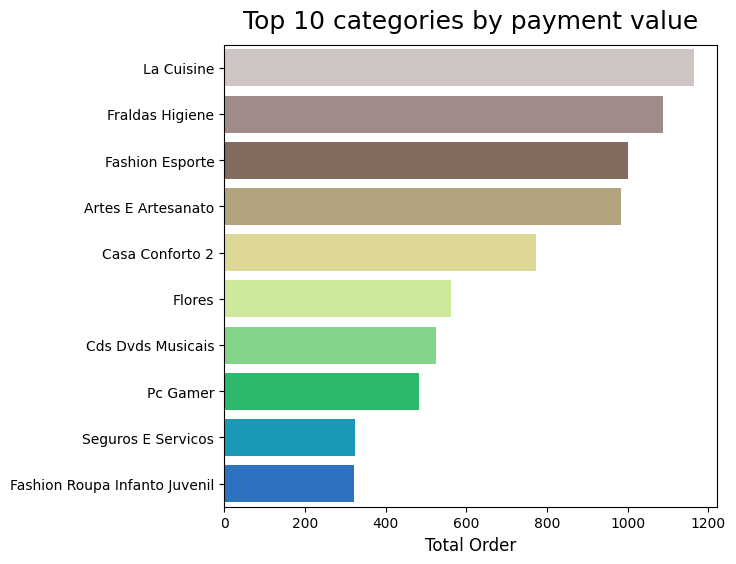

In [ ]:
# Adjust the figure size
plt.figure(figsize = (14, 6))

# Plot num-1: Top categories by total order
plt.subplot(1,2,1)

# Calculate total order for each category
data_group_1 = ecommerce_df.groupby(['product_category_name'], as_index = False)['payment_value'].sum().sort_values('payment_value', ignore_index = True, ascending=False).tail(10)

# Create bar plot
sns.barplot(data = data_group_1, x = 'payment_value', y = 'product_category_name', palette = 'terrain_r')

# Setting some visual options
plt.ylabel(None)
plt.xlabel('Total Order', fontdict = {'fontsize': 12})
plt.title('Top 10 categories by payment value', fontdict = {'fontsize': 18}, pad = 12)

plt.show()

We can see interseting information:
- From total of 71 product, some categories like fashion_esporte, la_cuisine, artes_e_artesanato, fraldas_higiene, flores, Pc Games, Casa Conforto 2, Cds Dvds Musicais, Fashion Roupa Infanto Juvenil and Sequros E Servicos are the most order by customer in Brazil

###### Bar chart - Display overview of total order by region

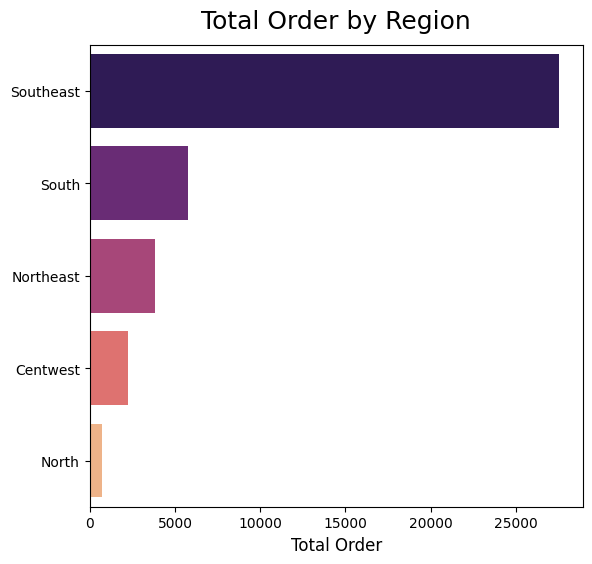

In [ ]:
# Adjust the figure size
plt.figure(figsize = (14, 6))

# Plot num-1: Rank region by total order
plt.subplot(1,2,1)

# Calculate total order for each region
data_group_2 = ecommerce_df.groupby('customer_Region').agg(
    num_of_order=pd.NamedAgg(column='order_id', aggfunc='nunique')
).reset_index()

data_group_2 = data_group_2.sort_values(by = ['num_of_order'], ignore_index = True, ascending=False).head(10)

# Create bar plot
sns.barplot(data = data_group_2, x = 'num_of_order', y = 'customer_Region', palette = 'magma')

# Setting some visual options
plt.ylabel(None)
plt.xlabel('Total Order', fontdict = {'fontsize': 12})
plt.title('Total Order by Region', fontdict = {'fontsize': 18}, pad = 12)

plt.show()

We can see interseting information:
- The most orders come from customers located in Southeast area
- So there are many variety customer from Sao Paulo, Rio de Janeiro, Espírito Santo, Minas Gerais (southeast area)

##### Question num-3

###### Insert new data from order purchase date per day into new dataFrame

In [ ]:
# Calculate all the order_id per day & order_date_day
group_order_day = ecommerce_df.groupby('order_date_day')['order_id'].nunique()
group_order_day = pd.DataFrame(group_order_day)
group_order_day.reset_index(inplace=True)
group_order_day = group_order_day.sort_values(by = ['order_id'], ascending=False)
group_order_day.head()

,order_date_day,order_id
1,Monday,6569
5,Tuesday,6385
6,Wednesday,6219
4,Thursday,6014
0,Friday,5733


###### Insert new data from payment type into new dataFrame

In [ ]:
# Calculate all the order_id per day & payment type
group_payment_day = ecommerce_df.groupby('payment_type')['order_id'].nunique()
# Convert all the order_id into %
payment_day_percentage = (group_payment_day / ecommerce_df['order_id'].nunique() * 100).round(2)
payment_day_percentage = pd.DataFrame(payment_day_percentage)
payment_day_percentage.reset_index(inplace=True)
payment_day_percentage

,payment_type,order_id
0,Boleto,19.76
1,Credit Card,77.18
2,Debit Card,1.59
3,Voucher,3.79


###### Pie chart - Display distribution of payment type by number of order

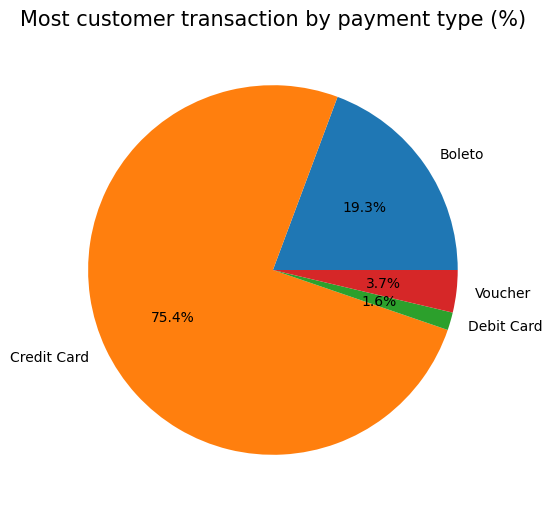

In [ ]:
# Adjust the figure size
plt.figure(figsize = (14, 6))

# Create pie plot
plt.pie(payment_day_percentage['order_id'], labels = payment_day_percentage['payment_type'], autopct='%1.1f%%')

# Setting some visual options
plt.title('Most customer transaction by payment type (%)', fontdict = {'fontsize': 15}, pad = 10)

plt.show()

We can see interseting information:
- Most of the customer (75%) use credit card as a method payment for doing transaction
- Customer use less physical voucher (3%) rather than using boleto (19%) for buying things <br><br>
note:
boleto is an official (regulated by the Central Bank of Brazil) payment method in Brazil. To complete a transaction, customers receive a voucher stating the amount to pay for services or goods (source: https://stripe.com/)


### <font color='darkred'>C. RFM (Recency, Frequency, Monetary) Analysis</font>

RFM analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. It helps business owner to analyze their store customers current status and segment them according to these RFM scores.

RFM stands for:
- Recency (R): How recently did the customer purchase? This metric shows how many days/weeks/months/years have passed since the last purchase. Lower recency means that the client is better than other clients with more time after the last revenue.
- Frequency (F): How often do they purchase? This metric of periodicity, as if a client generates revenue more often than others, then it is potentially more valuable than others. A higher frequency is better.
- Monetary Value (M): How much do they spend? This metric captures the monetary impact from a particular client, accumulated over time. More value is better.


#### Data Preparation

In [ ]:
# Copy existing dataFrame into new dataFrame
new_orders_df = orders_df_sort_custom.copy()
# Use slicing to get columns 1 to 3
new_orders_df_slice = new_orders_df.iloc[:,:4]
# Subset rows from order_status with 'delivered' value
new_orders_df_slice = new_orders_df_slice.loc[(new_orders_df_slice['order_status'] == 'delivered')]
# Converting format datetime
new_orders_df_slice['order_purchase_timestamp'] = pd.to_datetime(new_orders_df_slice.order_purchase_timestamp)
# Count the number of missing values in each column
new_orders_df_slice.isnull().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
dtype: int64

In [ ]:
# Count the number of missing values in each column
new_orders_df_slice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40112 entries, 0 to 41339
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  40112 non-null  object        
 1   customer_id               40112 non-null  object        
 2   order_status              40112 non-null  object        
 3   order_purchase_timestamp  40112 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 1.5+ MB


In [ ]:
# Combine all custom table into 1 dataFrame
order_cust_df_rfm = new_orders_df_slice.merge(customers_df_slice, on='customer_id')
order_cust_pay_df_rfm = order_cust_df_rfm.merge(order_payments_df_slice, on='order_id') # use old custom order_payment dataframe
# Count the number of missing values in each column
order_cust_pay_df_rfm.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_city,customer_state,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,Sao Paulo,SP,Credit Card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,Sao Paulo,SP,Voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,Sao Paulo,SP,Voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,Barreiras,BA,Boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,Vianopolis,GO,Credit Card,179.12


In [ ]:
# Count the number of missing values in each column
order_cust_pay_df_rfm.isnull().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
customer_city               0
customer_state              0
payment_type                0
payment_value               0
dtype: int64

In [ ]:
# Copy existing dataFrame into new dataFrame
rfm_df = order_cust_pay_df_rfm.copy()
rfm_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_city,customer_state,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,Sao Paulo,SP,Credit Card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,Sao Paulo,SP,Voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,Sao Paulo,SP,Voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,Barreiras,BA,Boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,Vianopolis,GO,Credit Card,179.12


#### RFM Metrics

First to calculate ***recency*** as the difference between the maximum date and each order date in the dataset

In [ ]:
# Check the last date in the order_purchase_date column by calculating the maximum value of the customer transaction date
last_date = rfm_df['order_purchase_timestamp'].max()
# Since the dataset is not the most recent, we will use max+1 instead of the current date.
current_date = last_date + dt.timedelta(days=1)
# Define current date
print(f"Current date is: {current_date}")

Current date is: 2018-08-30 14:18:28


In [ ]:
# Calculate all the customer_id per day & order_purchase_timestamp
rfm_df_r = rfm_df.groupby(['customer_id'], as_index = False)['order_purchase_timestamp'].max()
# Extracting attributes from order_purchase_timestamp to new column recency
rfm_df_r['recency'] = rfm_df_r['order_purchase_timestamp'].apply(lambda x: (current_date - x)).dt.days
# Remove unuse order_purchase_timestamp
rfm_df_r.drop(columns=['order_purchase_timestamp'], inplace = True)
rfm_df_r.head(6)

,customer_id,recency
0,000161a058600d5901f007fab4c27140,410
1,000379cdec625522490c315e70c7a9fb,150
2,0005aefbb696d34b3424dccd0a0e9fd0,71
3,000bf8121c3412d3057d32371c5d3395,323
4,000e943451fc2788ca6ac98a682f2f49,496
5,001051abfcfdbed9f87b4266213a5df1,92


Second and third to calculate ***frequency*** representing as total number of purchases made by each customer and ***monetary*** representing as total monetary contribution of each customer

In [ ]:
# Calculate all the customer_id per day, order_id, and payment_value and change the column name
rfm_df_fm = rfm_df.groupby('customer_id').agg(
    frequency=pd.NamedAgg(column='order_id', aggfunc='count'),
    monetary=pd.NamedAgg(column='payment_value', aggfunc='sum')
).reset_index()
rfm_df_fm.head(6)

,customer_id,frequency,monetary
0,000161a058600d5901f007fab4c27140,1,67.41
1,000379cdec625522490c315e70c7a9fb,1,107.01
2,0005aefbb696d34b3424dccd0a0e9fd0,1,147.33
3,000bf8121c3412d3057d32371c5d3395,1,45.56
4,000e943451fc2788ca6ac98a682f2f49,2,52.63
5,001051abfcfdbed9f87b4266213a5df1,3,65.20


In [ ]:
# Combine all custom table into 1 dataFrame
rfm_df_mts = rfm_df_r.merge(rfm_df_fm, on='customer_id')
rfm_df_mts.head(6)

,customer_id,recency,frequency,monetary
0,000161a058600d5901f007fab4c27140,410,1,67.41
1,000379cdec625522490c315e70c7a9fb,150,1,107.01
2,0005aefbb696d34b3424dccd0a0e9fd0,71,1,147.33
3,000bf8121c3412d3057d32371c5d3395,323,1,45.56
4,000e943451fc2788ca6ac98a682f2f49,496,2,52.63
5,001051abfcfdbed9f87b4266213a5df1,92,3,65.20


In [ ]:
rfm_df_mts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40111 entries, 0 to 40110
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  40111 non-null  object 
 1   recency      40111 non-null  int64  
 2   frequency    40111 non-null  int64  
 3   monetary     40111 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ MB


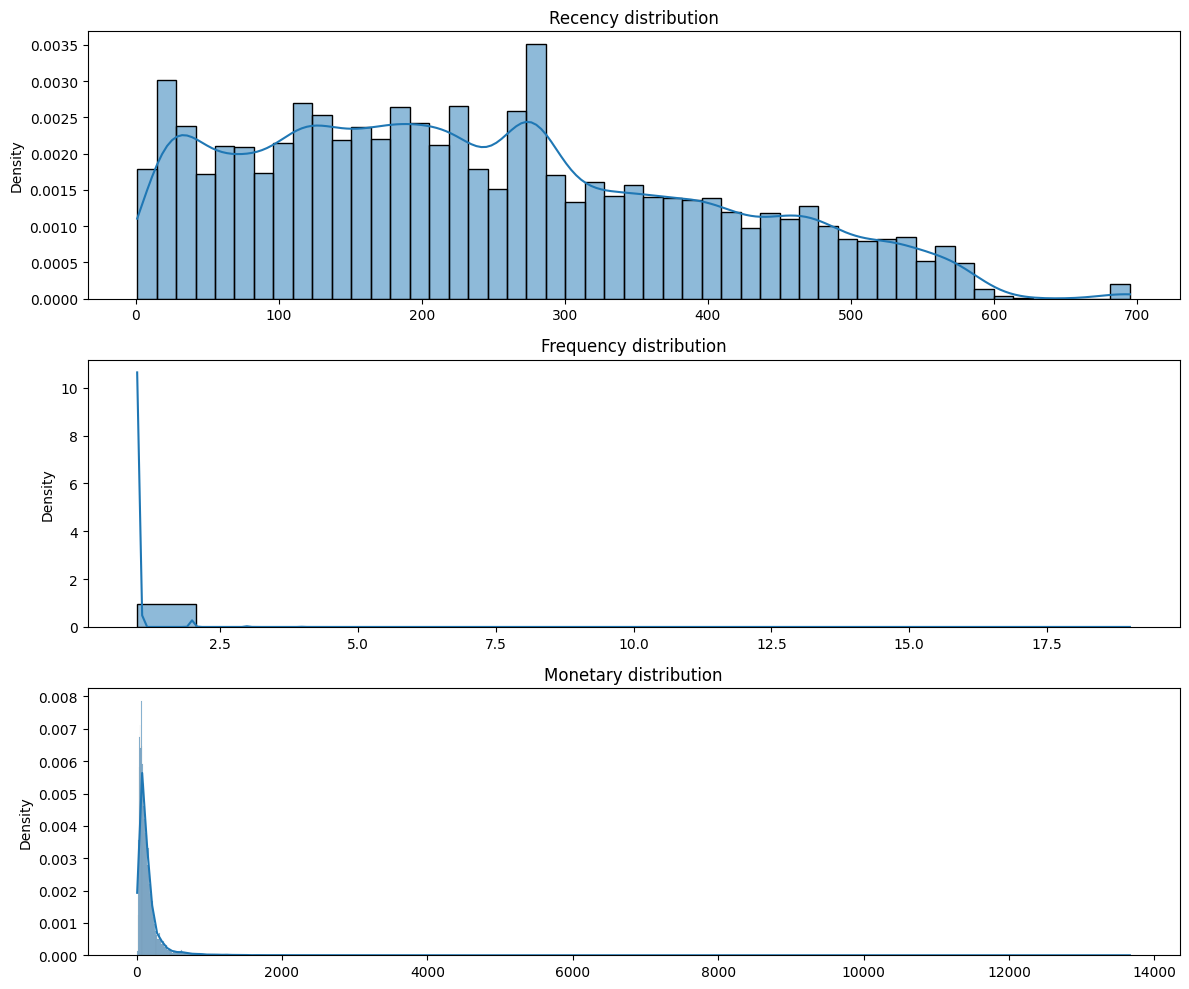

In [ ]:
# Adjust the figure size
plt.figure(figsize=(12, 10))

#Recency
plt.subplot(3, 1, 1)
# Create histplot
sns.histplot(rfm_df_mts['recency'], kde=True, stat="density")
# Setting some visual options
plt.title('Recency distribution')
plt.xlabel(None)

#Frequency
plt.subplot(3, 1, 2)
# Create histplot
sns.histplot(rfm_df_mts['frequency'], kde=True, stat="density")
# Setting some visual options
plt.title('Frequency distribution')
plt.xlabel(None)

#Monetary
plt.subplot(3, 1, 3)
# Create histplot
sns.histplot(rfm_df_mts['monetary'], kde=True, stat="density")
# Setting some visual options
plt.title('Monetary distribution')
plt.xlabel(None)

plt.tight_layout()

Create a Histogram/Histplot to show distribution of R-F-M value

#### RFM Scoring

Customer score rule: <br>
* To set the grade/score, concatenate all value into 'RFM' column using quantiles method
* The score will split into a range from 1 to 5
* Each score have different meaning: <br>
  -> We assigned scores from 5 to 1 to calculate the recency score, where a lower score indicates a more recent purchase. <br>
  -> We assigned scores from 1 to 5 to calculate the frequency score, where a higher score indicates a higher purchase frequency. <br>
  -> We assigned scores from 1 to 5 to calculate the monetary score, where a higher score indicates a higher amount spent by the customer.

In [ ]:
quantiles = rfm_df_mts.quantile(q = [0.20, 0.40, 0.60, 0.80])
quantiles = quantiles.to_dict()

<ipython-input-82-df9c67b61a5e>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = rfm_df_mts.quantile(q = [0.20, 0.40, 0.60, 0.80])


In [ ]:
# Create function to define scoring criteria
def RScore(x,p,d):
     if x <= d[p][0.20]:
         return 5
     elif x <= d[p][0.40]:
         return 4
     elif x <= d[p][0.60]:
         return 3
     elif x<=d[p][0.80]:
         return 2
     else:
         return 1

def FMScore(x, p, d):
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]:
        return 3
    elif x<=d[p][0.80]:
        return 4
    else:
        return 5

In [ ]:
# Copy existing dataFrame into new dataFrame
rfm_df_score = rfm_df_mts.copy()
# Calculate R, F, and M score
rfm_df_score['recency_quartile'] = rfm_df_score['recency'].apply(RScore, args=('recency', quantiles,))
rfm_df_score['frequency_quartile'] = rfm_df_score['frequency'].apply(FMScore, args=('frequency', quantiles,))
rfm_df_score['monetary_quartile'] = rfm_df_score['monetary'].apply(FMScore, args=('monetary', quantiles,))
# Display overall score by combining individual score
rfm_df_score['rfm_score'] = rfm_df_score['recency_quartile'].astype(str) + rfm_df_score['frequency_quartile'].astype(str) + rfm_df_score['monetary_quartile'].astype(str)
rfm_df_score.head()

,customer_id,recency,frequency,monetary,recency_quartile,frequency_quartile,monetary_quartile,rfm_score
0,000161a058600d5901f007fab4c27140,410,1,67.41,1,1,2,112
1,000379cdec625522490c315e70c7a9fb,150,1,107.01,4,1,3,413
2,0005aefbb696d34b3424dccd0a0e9fd0,71,1,147.33,5,1,4,514
3,000bf8121c3412d3057d32371c5d3395,323,1,45.56,2,1,1,211
4,000e943451fc2788ca6ac98a682f2f49,496,2,52.63,1,5,1,151


#### RFM Segmentations

Customer segment list:

Name | Description
--- | ---
Champions | Customer bought recently, buy often and spend the most
Loyal Customers | Customer spend good money and often, responsive to promotions
Potential Loyalist | Customer recent customers, but spent a good amount and bought more than once
New Customers | Customer bought most recently, but not often
Promising | Customer recent shoppers, but haven’t spent much
Needing Attention | Customer above average recency, frequency and monetary values
About To Sleep  | Customer below average recency, frequency and monetary values
At Risk | Customer spent big money and purchased often but long time ago
Can't Loose Them | Customer made biggest purchases, and often but haven’t returned for a long time
Hibernating | Customer last purchase was long back, low spenders and low number of orders

<br><br>
note: [to see more detail about the segment list, click this hyperlink](https://documentation.bloomreach.com/engagement/docs/rfm-segmentation)

In [ ]:
# List all score and segment into dictionary
label = {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers',
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}
# Copy existing dataFrame into new dataFrame
rfm_df_segment = rfm_df_score.copy()
# Replace all instances of RFM score
rfm_df_segment['segments'] = rfm_df_segment['rfm_score'].replace(label, regex=True)
# Count all instrument in segments column
rfm_df_segment['segments'].value_counts()

Promising                14311
Cannot Lose Them          7721
New Customers             7651
Lost customers            3249
Hibernating customers     3142
About To Sleep            3089
Potential Loyalist         400
At Risk                    300
Champions                  158
Loyal                       90
Name: segments, dtype: int64

Most of the customers belong to "promising" segment, they are those that bought recently and purchased lowest priced items.

#### Data Analysis Result

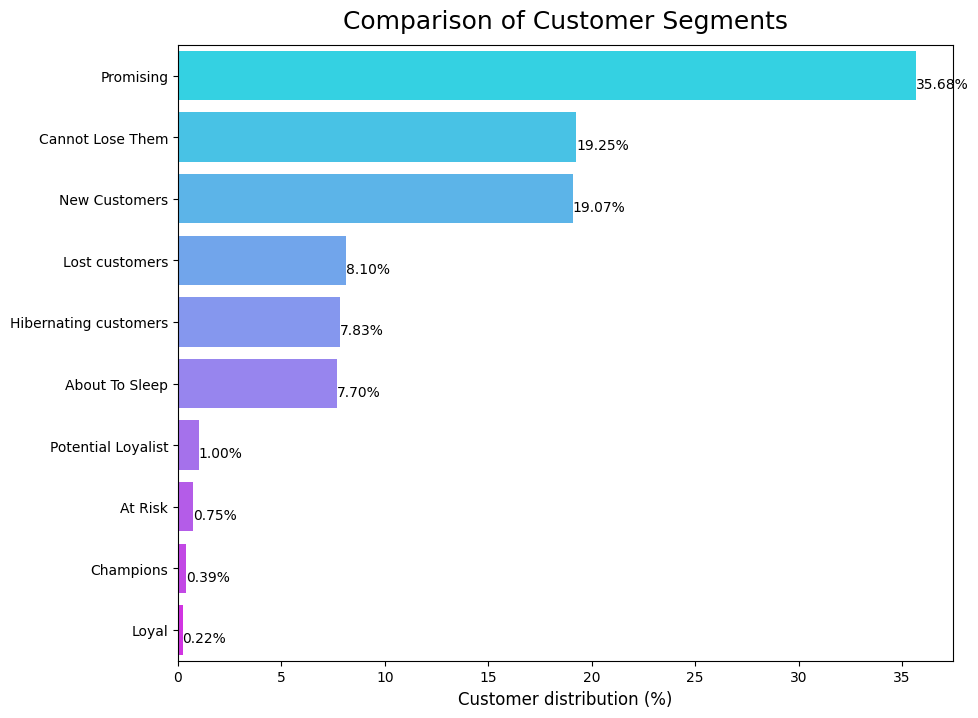

In [ ]:
# Adjust the figure size
plt.figure(figsize = (10, 8))

# Calculate total customer per segment (%) into new column
data = (rfm_df_segment['segments'].value_counts(normalize=True)*100).reset_index(name = "percentage")
ax = sns.barplot(x = data['percentage'], y = data['index'], data = data, palette = "cool")

# Create bar plot
for i, v in enumerate(data['percentage']):
  ax.text(v, i+0.20, "{:.2f}".format(v)+"%", color = 'black', ha = 'left')

# Setting some visual options
plt.ylabel(None)
plt.xlabel('Customer distribution (%)', fontdict = {'fontsize': 12})
plt.title('Comparison of Customer Segments', fontdict = {'fontsize': 18}, pad = 12)

plt.show()

We can see interseting information: <br>
* Promising - 35.67% of all customer -> they are recent shoppers and can benefit from limited-time loyalty points and other perks
* Cannot lose them - 19.12% of all customer -> this customers demonstrated a strong willingness to pay but haven't returned for a long time
* New customers - 18.98% of all customer -> new buyers visiting the store for the first time
* Lost customers - 8.21% of all customer -> the old customers who haven't bought in a long time
* Hibernating customers - 7.87% of all customer -> this customers are those who haven't purchased in the last view months
* About to sleep - 7.78% of all customer -> this customers are potential to become inactive customer
* Potential loyalist - 1% of all customer -> this customers who buy most often from your store
* At risk - 0.78 % of all customer -> this customers who haven't come back often, but a strong buyer in past time
* Champions - 0.40 % of all customer -> they are loyal customers and strong buyer one of the most important categories to maintain
* Loyal - 0.19 % of all customer -> this customers who buy most often from your store

### <font color='darkred'>D. Business Recommendation </font>

For some certain month like on February, company can hold campaign for Valentine's Day to increase sales and number of order. It can be also optimizing sales by giving promo and discount code on August for Hari Kemerdekaan Indonesia celebrations or maybe on October with Halloween celebrations.

There are  recommendation for the characteristics of each RFM segment to approach them for effective marketing: <br>
* For champions segment -> focus on loyalty programs and new product launches
* For loyal segment -> loyalty programs are effective for these repeat visitors. Ask them with engagement programs for review product, promo, etc.
* For potential loyalist segment -> focus on increasing monetization through product recommendations based and incentives
* For new customer segment -> keep up their customer engagement by contact them through personal email or social media. They can use referral program by incentivizing them to refer service or product to a friend.
* For customer needing attention segment -> give them promotion or special offer with limited time
* For at risk segment -> send them automate an email or newsletter about new brand or product type
* For can't lose them segment -> consider renewal member or subscription levels, other loyalty strategies. Don't lose them to competition.
* For hibernating customer segment -> bring those hibernating / idle customers back or at least say something like “We’ve missed you!” or “Hey, it’s been a while!", etc
* For lost customer segment -> reviving interest with outreach campaigns




### References:
1. Monika Fowle (2023) The Best Customer Segmentation Examples for Digital Marketing. Source: https://www.brevo.com/blog/customer-segmentation-examples/
<br>
2. Aman Kharwal (2023) RFM Analysis using Python. Source: https://thecleverprogrammer.com/2023/06/12/rfm-analysis-using-python/#:~:text=RFM%20Analysis%20is%20used%20to,and%20value%20to%20a%20business.
<br>
3. Dima Diachkov (2023) Customer segmentation in Python with RFM model — Attack on Python. Source: https://blog.devgenius.io/customer-segmentation-in-python-with-rfm-model-attack-on-python-4-217383ce86bc
<br>
4. Anish Nair (2023) RFM Analysis For Successful Customer Segmentation. Source: https://www.putler.com/rfm-analysis/
<br>
5. Uncategorized (2022) 9 customer segmentation examples and methods. Source: https://octolis.com/blog/customer-segmentation-examples
